# Tugas Akhir Machine Learning
## Nilai A Barokah 


### 1. Data

#### Preprocessing Data

In [72]:
import random
import numpy as np
import pandas as pd
import sklearn

original_fitur_name = ['ncd', 'ai', 'as_na', 'bl', 'nac', 'as_nac', 'cs', 'at', 'na', 'adl', 'nad']
days = [0, 1, 2, 3, 4, 5, 6]
name = []

# generate attribute name
for i in range(len(original_fitur_name)):
    for j in range(len(days)):
        name.append(original_fitur_name[i]+"_"+str(days[j]))
name.append('y')        
twitter_data = pd.read_csv('data.csv', skiprows=[], index_col=False, names = name)

print(twitter_data.shape)
#help(pd.read_csv)

(140707, 78)


In [73]:
#print(twitter_data.iloc[0])

print(twitter_data.head(5))

   ncd_0  ncd_1  ncd_2  ncd_3  ncd_4  ncd_5  ncd_6  ai_0  ai_1  ai_2 ...   \
0    889    939    960    805    805   1143   1121   549   613   587 ...    
1    542    473    504    626    647    795    832   366   288   318 ...    
2     92     99    196    100    184     79    162    66    59   118 ...    
3     90     87     92    344    184    848    184    83    78    76 ...    
4    169     98    101     90     96     95    185   141    68    85 ...    

   adl_5  adl_6  nad_0  nad_1  nad_2  nad_3  nad_4  nad_5  nad_6    y  
0    1.0    1.0    889    939    960    805    805   1143   1121  1.0  
1    1.0    1.0    542    473    504    626    647    795    832  1.0  
2    1.0    1.0     92     99    196    100    184     79    162  0.0  
3    1.0    1.0     90     87     92    344    184    848    184  1.0  
4    1.0    1.0    169     98    101     90     96     95    185  1.0  

[5 rows x 78 columns]


In [74]:
from pydoc import help
from scipy.stats.stats import pearsonr

In [75]:
#twitter_data.corr()
newDF = pd.DataFrame() #creates a new dataframe that's empty

for i in range(twitter_data.shape[1]-1):
    if i%7 == 1 :
        newDF[name[i]] = twitter_data[name[i]]
#print(twitter_data['ncd_1'])
print(newDF.corr())
selected_fitur = ['ncd', 'ai', 'as_na', 'bl', 'nac', 'as_nac', 'cs', 'at', 'na', 'adl', 'nad'] #['ncd', 'cs', 'ai', 'as_na', 'as_nac', 'at', 'na','adl']
unselected_fitur = ['nad','nac', 'bl']

             ncd_1      ai_1   as_na_1      bl_1     nac_1  as_nac_1  \
ncd_1     1.000000  0.897422  0.889338  0.102502  0.997141  0.885031   
ai_1      0.897422  1.000000  0.844026  0.112000  0.899486  0.758612   
as_na_1   0.889338  0.844026  1.000000  0.111251  0.896361  0.958829   
bl_1      0.102502  0.112000  0.111251  1.000000  0.104134  0.100963   
nac_1     0.997141  0.899486  0.896361  0.104134  1.000000  0.888893   
as_nac_1  0.885031  0.758612  0.958829  0.100963  0.888893  1.000000   
cs_1      0.100844  0.110341  0.109900  0.991274  0.102902  0.099833   
at_1      0.020632  0.026529  0.025772  0.201936  0.023788  0.023335   
na_1      0.970894  0.950114  0.913863  0.109897  0.976217  0.852975   
adl_1     0.017561  0.022973  0.023218  0.189700  0.022218  0.022044   
nad_1     0.999995  0.897545  0.889694  0.102566  0.997308  0.885237   

              cs_1      at_1      na_1     adl_1     nad_1  
ncd_1     0.100844  0.020632  0.970894  0.017561  0.999995  
ai_1      0.1

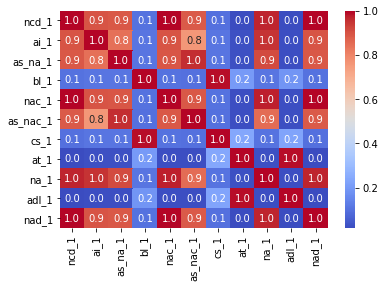

In [76]:
import seaborn as sns
corr_martix=newDF.corr()
sns.heatmap(corr_martix,cbar=True,annot=True,fmt='.1f',cmap='coolwarm');
selected_fitur2 = ['ncd', 'ai', 'as_na', 'bl','adl'] #['ncd', 'cs', 'ai', 'as_na', 'as_nac', 'at', 'na','adl']
unselected_fitur2 = ['nad','at','nac', 'na', 'as_nac', 'cs']

In [77]:
#selected_fitur = ['ncd', 'ai', 'as_na', 'bl', 'nac', 'as_nac', 'cs', 'at', 'na', 'adl', 'nad']
selected_X = pd.DataFrame()
selected_name = []

for i in range(len(selected_fitur2)):
    for j in range(len(days)):
        selected_name.append(selected_fitur2[i]+"_"+str(days[j]))
        selected_X[selected_fitur2[i]+"_"+str(days[j])] = twitter_data[selected_fitur2[i]+"_"+str(days[j])]

selected_y = pd.DataFrame()
selected_y['y'] = twitter_data['y']

selected_data = selected_X

selected_data['y'] = selected_y

print(selected_data.shape)
#print(selected_data.head())

(140707, 36)


#### Data Split for Y = 0

In [78]:
selected_data_y0 = selected_data[selected_data.y == 0]
print(selected_data_y0.shape)
#print(selected_data_y0.head())

training_data_y0 = pd.DataFrame()

training_data_y0 = selected_data_y0.iloc[0:79051]
print(training_data_y0.shape)
#print(training_data_y0.head())

#training_data_y0.to_csv('training_set1.csv', float_format = '%.6f', index = False, header = True)

testing_data_y0 = pd.DataFrame()

testing_data_y0 = selected_data_y0.iloc[79052:112932]
print(testing_data_y0.shape)
#print(testing_data_y0.head())

#testing_data_y0.to_csv('testing_set1.csv', float_format = '%.6f', index = False, header = True)

(112932, 36)
(79051, 36)
(33880, 36)


#### Data Split for Y = 1

In [79]:
selected_data_y1 = selected_data[selected_data.y == 1]
print(selected_data_y1.shape)
#print(selected_data_y1.head())

training_data_y1 = pd.DataFrame()

training_data_y1 = selected_data_y1.iloc[0:19441]
print(training_data_y1.shape)
#print(training_data_y1.head())

testing_data_y1 = pd.DataFrame()

testing_data_y1 = selected_data_y1.iloc[19442:27775]
print(testing_data_y1.shape)
#print(testing_data_y1.head())

(27775, 36)
(19441, 36)
(8333, 36)


#### Training Set #1

In [80]:
training_set1 = pd.concat([training_data_y0, training_data_y1])
print(training_set1.shape)
#print(training_set1.head())

training_set1.to_csv('training_set1.csv', float_format = '%.6f', index = False, header = True)

(98492, 36)


#### Testing Set #1

In [81]:
testing_set1 = pd.concat([testing_data_y0, testing_data_y1])
print(testing_set1.shape)
#print(testing_set1.head())

testing_set1.to_csv('testing_set1.csv', float_format = '%.6f', index = False, header = True)

(42213, 36)


#### Training Set #2 - #5

In [82]:
print(training_data_y0.shape)

num_groups = 4
group_y0 = pd.DataFrame()

group_y0 ['group'] = np.random.randint(num_groups, size = len(training_data_y0))
group_y0 = [grp for key, grp in group_y0.groupby('group')]

training_data_y01 = training_data_y0.iloc[(group_y0[0] == 0).index]
print(training_data_y01.shape)
#print(training_data_y01.head())

training_data_y02 = training_data_y0.iloc[(group_y0[1] == 0).index]
print(training_data_y02.shape)
#print(training_data_y02.head())

training_data_y03 = training_data_y0.iloc[(group_y0[2] == 0).index]
print(training_data_y03.shape)
#print(training_data_y03.head())

training_data_y04 = training_data_y0.iloc[(group_y0[3] == 0).index]
print(training_data_y04.shape)
#print(training_data_y04.head())

(79051, 36)
(19758, 36)
(19741, 36)
(19767, 36)
(19785, 36)


In [83]:
training_set2 = pd.concat([training_data_y01, training_data_y1])
print(training_set2.shape)
print(training_set2.head())

training_set2.to_csv('training_set2.csv', float_format = '%.6f', index = False, header = True)

(39199, 36)
    ncd_0  ncd_1  ncd_2  ncd_3  ncd_4  ncd_5  ncd_6  ai_0  ai_1  ai_2 ...   \
30     10     23     14     18     21     16     25     8    16     9 ...    
38      7     13      5      5      8     12     13     6    12     5 ...    
44     16     11     17     44     17     15     37    11     8    13 ...    
47      9      6      3      5     14     15     18     8     5     3 ...    
48      7      5      7     10      8      9     10     4     3     4 ...    

      bl_5  bl_6     adl_0  adl_1     adl_2  adl_3     adl_4     adl_5  \
30  1.0000   1.0  1.000000    1.0  1.000000    1.0  1.000000  1.000000   
38  1.0000   1.0  1.000000    1.0  1.200000    1.2  1.125000  1.000000   
44  0.9375   1.0  1.117647    1.0  1.111111    1.0  1.058824  1.187500   
47  1.0000   1.0  1.400000    1.0  1.000000    1.0  1.000000  1.066667   
48  1.0000   1.0  1.000000    1.0  1.000000    1.7  1.000000  1.000000   

       adl_6    y  
30  1.000000  0.0  
38  1.000000  0.0  
44  1.027027  

In [84]:
training_set3 = pd.concat([training_data_y02, training_data_y1])
print(training_set3.shape)
print(training_set3.head())

training_set3.to_csv('training_set3.csv', float_format = '%.6f', index = False, header = True)

(39182, 36)
    ncd_0  ncd_1  ncd_2  ncd_3  ncd_4  ncd_5  ncd_6  ai_0  ai_1  ai_2 ...   \
36      6      5      6     11      8      8      4     6     4     5 ...    
43     12     21     15     15     17     16     30    12    19    14 ...    
46     11      9     17     12      2     28      8     3     7    14 ...    
57     34     49     54     30     58     76     72    21    39    39 ...    
59      1      3      2      2      5      4      7     0     0     2 ...    

    bl_5  bl_6  adl_0     adl_1  adl_2  adl_3  adl_4     adl_5  adl_6    y  
36   1.0   1.0    1.0  1.000000    1.0    1.0    1.0  1.000000    1.0  0.0  
43   1.0   1.0    1.0  1.047619    1.0    1.0    1.0  1.062500    1.1  0.0  
46   1.0   1.0    1.0  1.000000    1.0    1.0    1.0  1.035714    1.0  0.0  
57   1.0   1.0    1.0  1.000000    1.0    1.0    1.0  1.000000    1.0  0.0  
59   1.0   1.0    1.0  1.000000    1.0    1.0    1.0  1.000000    1.0  0.0  

[5 rows x 36 columns]


In [85]:
training_set4 = pd.concat([training_data_y03, training_data_y1])
print(training_set4.shape)
print(training_set4.head())

training_set4.to_csv('training_set4.csv', float_format = '%.6f', index = False, header = True)

(39208, 36)
    ncd_0  ncd_1  ncd_2  ncd_3  ncd_4  ncd_5  ncd_6  ai_0  ai_1  ai_2 ...   \
25     11      4     14     10     14     10     12    11     1    13 ...    
31      5      3     13      4      5      7      2     5     3    10 ...    
34      2      3      1      8      5      4     15     2     2     1 ...    
35      6      5      7     11      9      4      7     4     4     5 ...    
37      7      8      8      6     10     17      4     6     7     8 ...    

    bl_5  bl_6  adl_0  adl_1  adl_2     adl_3  adl_4  adl_5  adl_6    y  
25   1.0   1.0  1.000    1.0   1.00  1.000000    1.0    1.0    1.0  0.0  
31   1.0   1.0  1.000    1.0   1.00  1.000000    1.0    1.0    1.0  0.0  
34   1.0   1.0  1.000    1.0   1.00  1.000000    1.0    1.0    1.0  0.0  
35   1.0   1.0  1.000    1.0   1.00  1.000000    1.0    1.0    1.0  0.0  
37   1.0   1.0  1.375    1.0   1.25  1.166667    1.2    1.0    1.0  0.0  

[5 rows x 36 columns]


In [86]:
training_set5 = pd.concat([training_data_y04, training_data_y1])
print(training_set5.shape)
print(training_set5.head())

training_set5.to_csv('training_set5.csv', float_format = '%.6f', index = False, header = True)

(39226, 36)
    ncd_0  ncd_1  ncd_2  ncd_3  ncd_4  ncd_5  ncd_6  ai_0  ai_1  ai_2 ...   \
2      92     99    196    100    184     79    162    66    59   118 ...    
26     19     13      8     11      9     20     17    16    11     8 ...    
27     38     26      8     23     11     29     35    25    22     7 ...    
28     11     13     20     22     20     17     16     9     9    15 ...    
29     17     21     14     14     16     15     39    14    17    10 ...    

    bl_5  bl_6  adl_0  adl_1  adl_2  adl_3  adl_4  adl_5  adl_6    y  
2    1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  0.0  
26   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  0.0  
27   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  0.0  
28   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  0.0  
29   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  0.0  

[5 rows x 36 columns]
